

***Recurrent Neural Network***




## Part 1 - Data Preprocessing

Importing the libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [85]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Feature scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scales=sc.fit_transform(training_set)



Creating a data structure with 60 timesteps and 1 output

In [43]:
X_train=[]
y_train=[]
for i in range(120,1258):
    X_train.append(training_set_scales[i-120:i,0])
    y_train.append(training_set_scales[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

Reshaping

In [44]:
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

#Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialising the RNN

In [72]:
regressor=Sequential()

Adding the first LSTM layer and some Dropout regularisation

In [73]:
regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.30))

Adding the second LSTM layer and some Dropout regularisation

In [74]:
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.30))

In [75]:
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.30))

Adding the third LSTM layer and some Dropout regularisation

In [76]:
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(0.30))

Adding the fourth LSTM layer and some Dropout regularisation

In [77]:
regressor.add(LSTM(units = 75, return_sequences = False))
regressor.add(Dropout(0.30))

Adding output layer

In [78]:
regressor.add(Dense(units=1))

compiling the RNN

In [79]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

Fitting the RNN to the Training set 

In [80]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
36/36 [==============================] - 13s 177ms/step - loss: 0.0503
Epoch 2/100
36/36 [==============================] - 6s 180ms/step - loss: 0.0079
Epoch 3/100
36/36 [==============================] - 7s 185ms/step - loss: 0.0066
Epoch 4/100
36/36 [==============================] - 6s 178ms/step - loss: 0.0066
Epoch 5/100
36/36 [==============================] - 6s 178ms/step - loss: 0.0061
Epoch 6/100
36/36 [==============================] - 6s 178ms/step - loss: 0.0057
Epoch 7/100
36/36 [==============================] - 7s 183ms/step - loss: 0.0060
Epoch 8/100
36/36 [==============================] - 7s 190ms/step - loss: 0.0054
Epoch 9/100
36/36 [==============================] - 7s 189ms/step - loss: 0.0045
Epoch 10/100
36/36 [==============================] - 7s 186ms/step - loss: 0.0052
Epoch 11/100
36/36 [==============================] - 7s 188ms/step - loss: 0.0048
Epoch 12/100
36/36 [==============================] - 7s 185ms/step - loss: 0.0051
Epoch 13/100

## part-3 Making the predictions and visualising the results

Getting the real stock price price of 2017

In [86]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:, 1:2].values
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


Getting the predicted stock price of 2017

In [82]:
dataset_total=pd.concat((dataset_train['Open'], dataset_test['Open']), axis= 0)
inputs= dataset_total[len(dataset_total) - len(dataset_test) -120:].values
inputs= inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test =[]
for i in range(120,140):
    X_test.append(inputs[i-120:i,0])
X_test=np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price= regressor.predict(X_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


Visualising the results

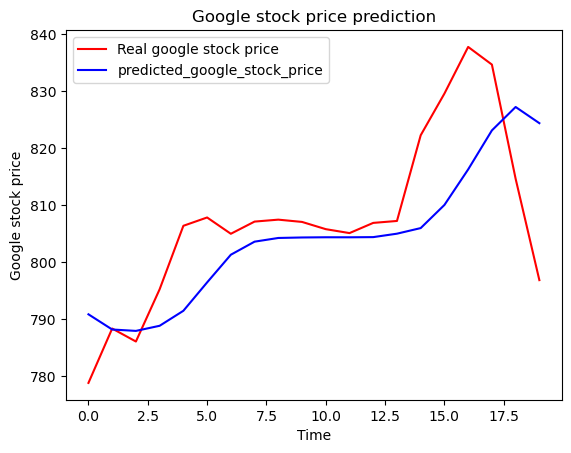

In [83]:
plt.plot(real_stock_price, color= 'red', label='Real google stock price')
plt.plot(predicted_stock_price, color= 'blue', label='predicted_google_stock_price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()